In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [5]:
df= df.drop(df.columns[:2], axis=1)

In [6]:
df = df.drop(['name'], axis=1)

In [7]:
df.head()

,brand,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [8]:
df.duplicated().sum()

2

In [9]:
df = df.drop_duplicates()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 892
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              891 non-null    object 
 1   price              891 non-null    int64  
 2   spec_rating        891 non-null    float64
 3   processor          891 non-null    object 
 4   CPU                891 non-null    object 
 5   Ram                891 non-null    object 
 6   Ram_type           891 non-null    object 
 7   ROM                891 non-null    object 
 8   ROM_type           891 non-null    object 
 9   GPU                891 non-null    object 
 10  display_size       891 non-null    float64
 11  resolution_width   891 non-null    float64
 12  resolution_height  891 non-null    float64
 13  OS                 891 non-null    object 
 14  warranty           891 non-null    int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 111.4+ KB


In [11]:
df.describe(include=np.number)

,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,80010.479237,69.379151,15.174590,2035.652076,1218.635241,1.079686
std,60909.441363,5.547777,0.939217,426.519323,327.057945,0.327301
min,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,44835.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [12]:
df.describe(include=[object])

,brand,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,OS
count,891,891,891,891,891,891,891,891,891
unique,30,184,29,7,12,7,2,134,14
top,HP,12th Gen Intel Core i5 1235U,"Quad Core, 8 Threads",16GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,Windows 11 OS
freq,186,49,129,456,498,633,870,107,780


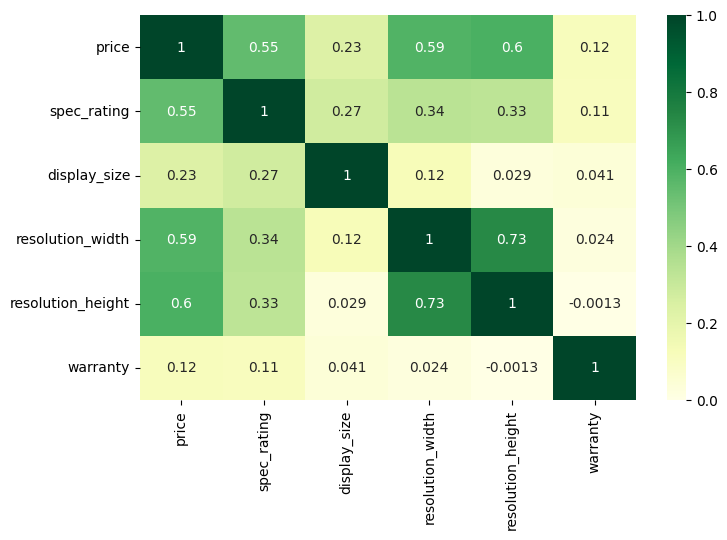

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(data=corr, annot=True, fmt=".2g", cmap='YlGn')
plt.show()

In [14]:
df.columns

Index(['brand', 'price', 'spec_rating', 'processor', 'CPU', 'Ram', 'Ram_type',
       'ROM', 'ROM_type', 'GPU', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'warranty'],
      dtype='object')

In [15]:
num_features = ['price', 'spec_rating', 'display_size', 'resolution_width',
       'resolution_height', 'warranty']

cat_features = ['brand', 'processor', 'CPU', 'Ram', 'Ram_type',
       'ROM', 'ROM_type', 'GPU', 'OS']

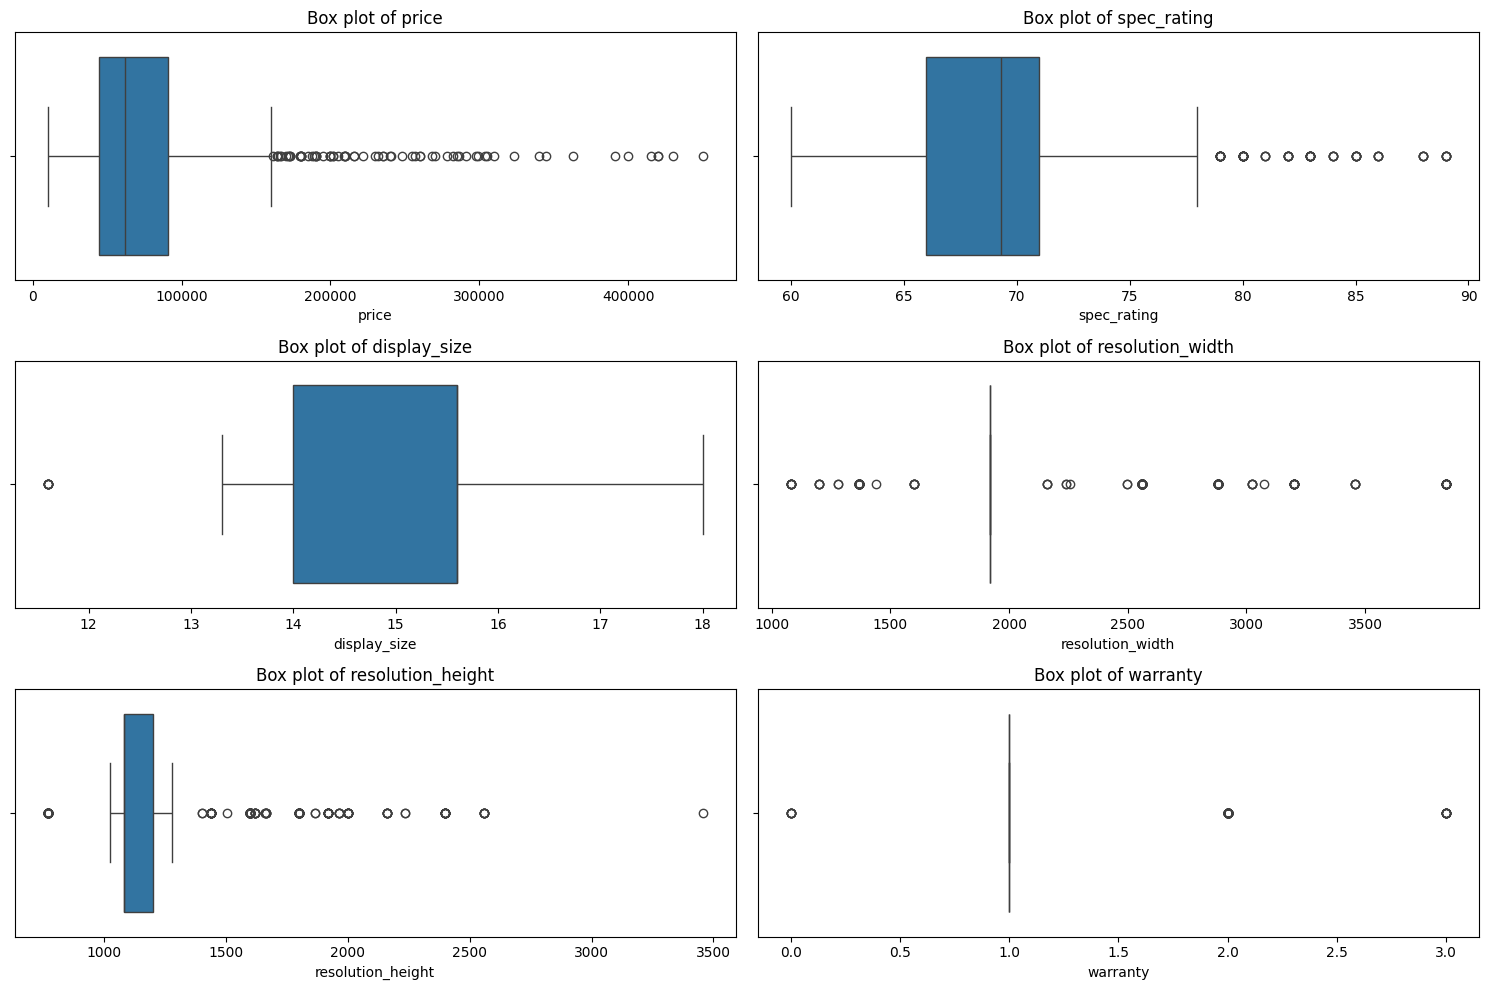

In [16]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

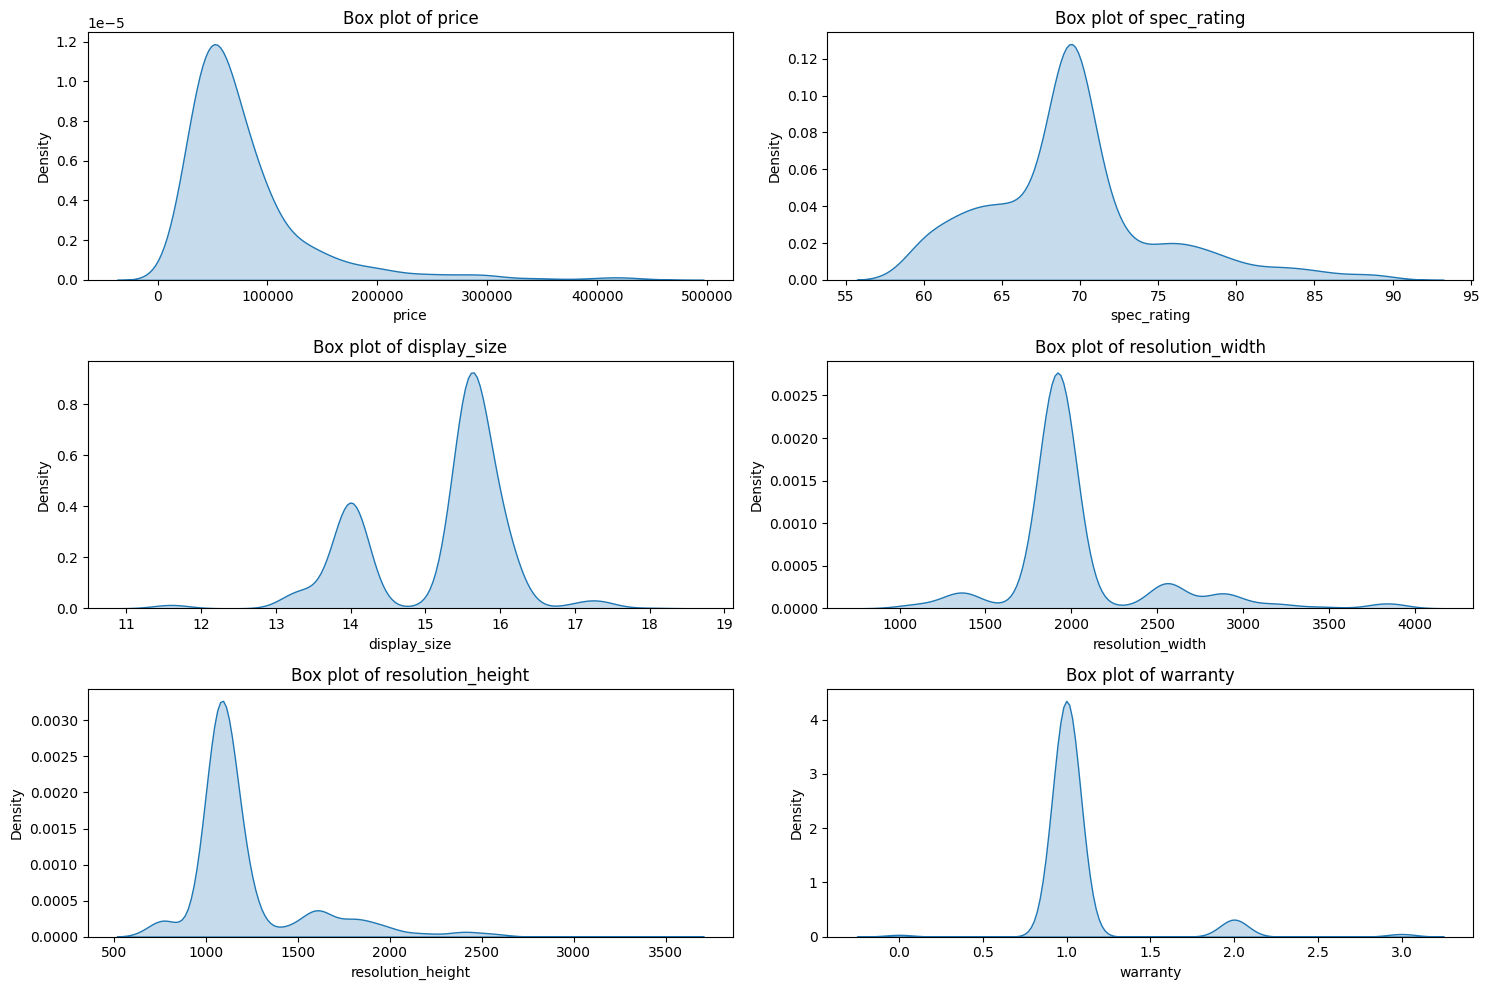

In [17]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features):
    plt.subplot(3,2, i+1)
    sns.kdeplot(x=feature, data=df, fill=True)
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

In [19]:
X = df.drop(['price'], axis=1)
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
numerique = ['spec_rating', 'display_size', 'resolution_width',
       'resolution_height', 'warranty']

In [22]:
num_transform = Pipeline(steps=[
    ('scaler' , StandardScaler())
])

cat_transform = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
    ('num', num_transform, numerique),
    ('cat', cat_transform, cat_features)
])

In [23]:
# Model 1 : RandomForestRegressor
pipeline_rf = Pipeline([
    ('preprocessor' , preprocessor), 
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Model 2 : LogisticRegression
pipeline_lr = Pipeline([
    ('preprocessor' , preprocessor),
    ('lr', LinearRegression())
])

# Modèle 3 : SVC
pipeline_bgr = Pipeline([
    ('preprocessor' , preprocessor),
    ('svc', BaggingRegressor(random_state=42))
])

In [27]:
# Training and evaluating models

pipelines = {'RandomForest': pipeline_rf, 'LinearRegression': pipeline_lr, 'BGR': pipeline_bgr}
results = {}

for model_name, pipeline in pipelines.items():
    # Fit the  model
    pipeline.fit(X_train, y_train)
    # Predictions
    y_pred = pipeline.predict(X_test)
    # Accuracy calculation
    mean_error = mean_absolute_error(y_test, y_pred)
    square_erreur_score = r2_score(y_test, y_pred)
    results[model_name] = [mean_error, square_erreur_score]
    print(f"{model_name} : Mean error : {mean_error} | Square error : {square_erreur_score}")

RandomForest : Mean error : 13820.703027445243 | Square error : 0.8646900921380369
LinearRegression : Mean error : 172698450210903.88 | Square error : -9.334020103172732e+19
BGR : Mean error : 14573.68398510242 | Square error : 0.8429731257617601
